In [6]:
## quick sample code guide adapted from codingdisciple.com

import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cols = ['age', 'workclass', 'fnlwg', 'education', 'education-num', 
        'marital-status','occupation','relationship', 'race','sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('census.csv', names=cols)

#Create a column for work hour categories.
def process_hours(df):
    cut_points = [0,9,19,29,39,49,1000]
    label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
    df["hours_per_week_categories"] = pd.cut(df["hours-per-week"],
                                             cut_points,labels=label_names)
    return df

data = process_hours(data)
workhour_by_sex = data[['sex', 'hours_per_week_categories']]
workhour_by_sex.head()

,sex,hours_per_week_categories
0,Male,40-49
1,Male,10-19
2,Male,40-49
3,Male,40-49
4,Female,40-49


In [7]:
workhour_by_sex['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [8]:
workhour_by_sex['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

### The Null and Alternate Hypotheses
Recall that we are interested in knowing if there is a relationship between 'sex' and 'hours_per_week_categories'. In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

$H0$:There is no statistically significant relationship between sex and the # of hours per week worked.<br>

$Ha$:There is a statistically significant relationship between sex and the # of hours per week worked.<br>


### Constructing the Contingency Table
The next step is to format the data into a frequency count table. This is called a Contingency Table, we can accomplish this by using the `pd.crosstab()` function in pandas.

In [9]:
contingency_table = pd.crosstab(
    workhour_by_sex['sex'],
    workhour_by_sex['hours_per_week_categories'],
    margins = True
)
contingency_table
# Each cell in this table represents a frequency count. 

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


#### Visualizing the Contingency Table with a Stacked Bar Chart

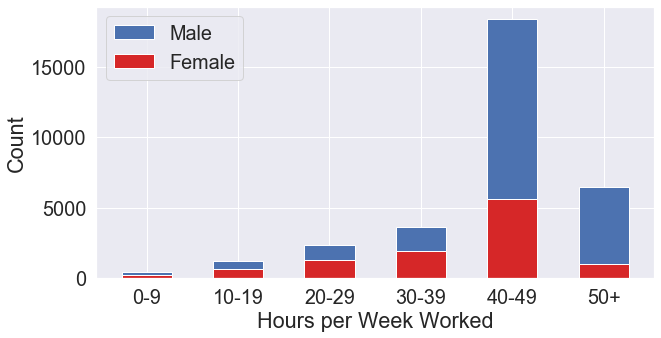

In [10]:
#Assigns the frequency values
malecount = contingency_table.iloc[0][0:6].values
femalecount = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

**The Chi-Squared Test for Independence** 
Calculation with Numpy
In order to determine whether we accept or reject the null hypothesis. We have to compute p-value similar to the welch's t-test and ANOVA. For testing with two categorical variables, we will use the Chi-squared test.

$$x^2 = \frac{(observed - expected)^2}{(expected)}$$

$$DoF = (Num rows - 1) * (Num cols - 1)$$

Where $X^2$ is the test statistic, observecd are values we have in the contingency table, expected are values we would expect assuming the null hypothesis is true. Theoretically speaking, if all the expected values are equal to the observed values, then the X2 statistic will be 0. As a result, the null hypothesis will be retained.

In [17]:
# All we need to do is format the observed values into a two-dimensional array and plug it into the function.
f_obs = np.array([contingency_table.iloc[0][0:6].values,  #female row
                  contingency_table.iloc[1][0:6].values]) # male row
f_obs

array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]], dtype=int64)

In [19]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(2287.190943926107, 0.0, 5)

$x^2$ = 2287 , p-value = 0, degrees of freedom = 5

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'sex' and the 'hours-per-week' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.